In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-27 14:57:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-27 14:57:44 (73.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [9]:
model = Sequential()
model.add(Embedding(total_words, 64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
#model.add(# Another LSTM Layer)
#model.add(# A Dense Layer including regularizers)
#model.add(# A Dense Layer)
# Pick an optimizer
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 685,771
Trainable params: 685,771
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.9088 - accuracy: 0.0206
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4833 - accuracy: 0.0269
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3220 - accuracy: 0.0354
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1233 - accuracy: 0.0437
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 5.9163 - accuracy: 0.0504
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.7084 - accuracy: 0.0576
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 5.4900 - accuracy: 0.0664
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.2796 - accuracy: 0.0783
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 5.0629 - accuracy: 0.0898
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 4.864

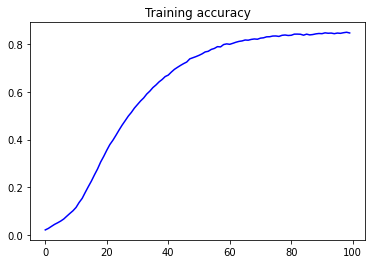

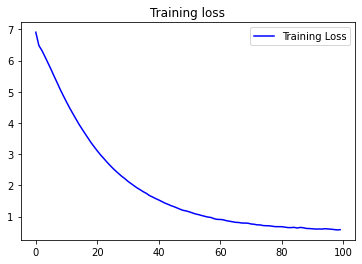

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope thy name muse hate are with he are near slain his boot rage mortal travel vice title bed prey was measure by i are due on dwell in any thing ' tell the strength of too frame me none dyed much hour such hour outright still usurer to find worse hast they hour more alone more more than war with love of mine eye is new fame both decay new and shall used ' luck trespass me last so like a makeless wife knowing to thee his glory in blame it is thee and of thy best can stay or
